In [1]:
import pandas as pd
import seaborn as sns
from datetime import datetime, timedelta
import requests
import mplfinance as mpf
import matplotlib.pyplot as plt

In [2]:
depth = 50
today = datetime.now()
start_date = today - timedelta(days=depth)
ticker = "C:EURUSD"
POLYGON_KEY="UWcgvKBcvcg3OQlNqyreJefVyuH6T7dj"
response = requests.get(f'https://api.polygon.io/v2/aggs/ticker/{ticker}/range/1/day/{start_date.strftime("%Y-%m-%d")}/{today.strftime("%Y-%m-%d")}?adjusted=true&sort=asc&apiKey={POLYGON_KEY}')

In [3]:
response = response.json()

In [4]:
data = response.get("results", None)
historical_data = pd.DataFrame(data)
historical_data['date'] = pd.to_datetime(historical_data['t'], unit='ms')
historical_data.sort_values("date")
historical_data.set_index('date', inplace=True)
historical_data.rename(columns={'o': 'Open', 'h': 'High', 'l': 'Low', 'c': 'Close'}, inplace=True)

In [5]:
def calculate_SMA(data: pd.DataFrame, length: int = 9):
    close_price = data["Close"].to_list()
    sma_list = [1] * length
    for i in range(length, len(close_price)):
        start = i - length
        point = sum(close_price[start:i]) / length
        sma_list.append(point)
    return sma_list

In [6]:
historical_data.head()

,v,vw,Open,Close,High,Low,t,n
date,,,,,,,,
2024-11-29,191191,1.0565,1.05600,1.05760,1.05972,1.05390,1732838400000,191191
2024-12-01,3004,1.0549,1.05584,1.05432,1.05686,1.05331,1733011200000,3004
2024-12-02,197561,1.0505,1.05434,1.05009,1.05460,1.04597,1733097600000,197561
2024-12-03,187362,1.0510,1.05004,1.05080,1.05351,1.04790,1733184000000,187362
2024-12-04,192994,1.0508,1.05100,1.05118,1.05440,1.04710,1733270400000,192994


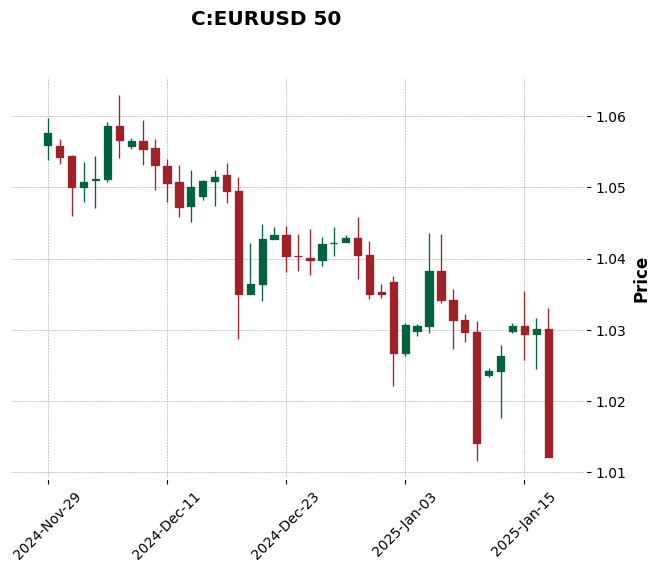

In [7]:
mpf.plot(historical_data, type='candle', style='charles', title=f"{ticker} {depth}", ylabel='Price')

In [8]:
sma9 = calculate_SMA(historical_data)
sma4 = calculate_SMA(historical_data, length=4)

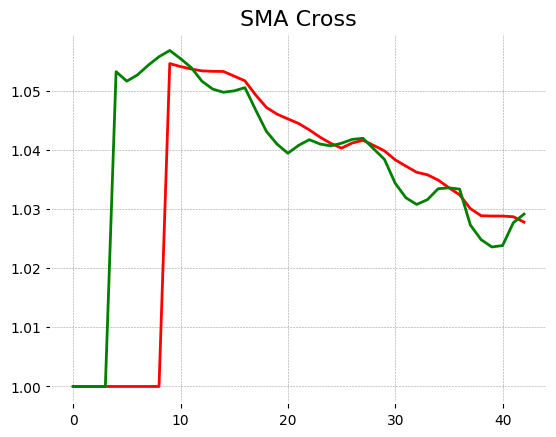

In [9]:
plt.plot(sma9, linestyle='-', color='r')
plt.plot(sma4, linestyle='-', color='g')

# Add labels and title
plt.title('SMA Cross', fontsize=16)

# Show the plot
plt.grid(True)  # Add grid for better readability
plt.show()